In [1]:
import json
import os
from grammar.metric import Metric
root_dir = 'benchmarks/aurp/eval_results/'



In [4]:
with open(os.path.join(root_dir, 'results_long_queries.json')) as f:
    results_for_long_queries = json.load(f)

with open(os.path.join(root_dir, 'results_long_queries_unbalanced.json')) as f:
    results_for_long_queries_unbalanced = json.load(f)

with open(os.path.join(root_dir,'results_shortest_queries.json')) as f:
    results_for_shortest_queries = json.load(f)

with open(os.path.join(root_dir, 'results_short_queries.json')) as f:
    results_for_short_queries = json.load(f)

results_for_long_queries = [result for domain in results_for_long_queries 
                            for result in results_for_long_queries[domain]]
results_for_shortest_queries = [result for domain in results_for_shortest_queries 
                             for result in results_for_shortest_queries[domain]]
results_for_short_queries = [result for domain in results_for_short_queries 
                             for result in results_for_short_queries[domain]]
results_for_long_queries_unbalanced = [result for domain in results_for_long_queries_unbalanced 
                                       for result in results_for_long_queries_unbalanced[domain]]

# long vs short
result_for_long_short_queries = {"long": results_for_long_queries, "short": results_for_short_queries}
metric_for_long_short_queries = Metric(result_for_long_short_queries)
accuracy_for_long_short_queries = metric_for_long_short_queries.get_accuracy(average_for_each_domain=True)
robustness_for_long_short_queries = metric_for_long_short_queries.get_robustness(average_for_each_domain=True, include_all_domains_for_tagging=True)
retrieval_robustness_for_long_short_queries = metric_for_long_short_queries.get_robustness(for_retrieval=True, average_for_each_domain=True, include_all_domains_for_tagging=True)
retrieval_accuracy_for_long_short_queries = metric_for_long_short_queries.get_accuracy(for_retrieval=True, average_for_each_domain=True)

# long vs shortest
result_for_long_shortest_queries = {"long": results_for_long_queries, "shortest": results_for_shortest_queries}
metric_for_long_shortest_queries = Metric(result_for_long_shortest_queries)
accuracy_for_long_shortest_queries = metric_for_long_shortest_queries.get_accuracy(average_for_each_domain=True)
robustness_for_long_shortest_queries = metric_for_long_shortest_queries.get_robustness(average_for_each_domain=True, include_all_domains_for_tagging=True)
retrieval_robustness_for_long_shortest_queries = metric_for_long_shortest_queries.get_robustness(for_retrieval=True, average_for_each_domain=True, include_all_domains_for_tagging=True)
retrieval_accuracy_for_long_shortest_queries = metric_for_long_shortest_queries.get_accuracy(for_retrieval=True, average_for_each_domain=True)

# long unbalanced vs shortest
metric_for_long_shortest_queries_unbalanced = Metric(
    {
        "long": results_for_long_queries_unbalanced, 
        "shortest": results_for_shortest_queries
    }
)
accuracy_for_long_shortest_queries_unbalanced = metric_for_long_shortest_queries_unbalanced.get_accuracy(average_for_each_domain=True)
robustness_for_long_shortest_queries_unbalanced = metric_for_long_shortest_queries_unbalanced.get_robustness(average_for_each_domain=True, include_all_domains_for_tagging=True)
retrieval_robustness_for_long_shortest_queries_unbalanced = metric_for_long_shortest_queries_unbalanced.get_robustness(for_retrieval=True, average_for_each_domain=True, include_all_domains_for_tagging=True)
retrieval_accuracy_for_long_shortest_queries_unbalanced = metric_for_long_shortest_queries_unbalanced.get_accuracy(for_retrieval=True, average_for_each_domain=True)

### Query Lengths

In [6]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'
from benchmark_models.retrieval.tokenizer import SpacyTokenizer

tokenizer = SpacyTokenizer()
# average length of shortest queries
shortest_queries = [result['query'] for result in results_for_shortest_queries]
avg_len_shortest = sum([len(tokenizer.tokenize(query)) for query in shortest_queries])/len(shortest_queries)

# average length of long queries
long_queries = [result['query'] for result in results_for_long_queries]
avg_len_long = sum([len(tokenizer.tokenize(query)) for query in long_queries])/len(long_queries)

print("Average Length of Short Queries:", avg_len_shortest) 
print("Average Length of Long Queries:", avg_len_long) 

Average Length of Short Queries: 9.427350427350428
Average Length of Long Queries: 29.737179487179485


### Data Statistics in Each Group Type 

In [25]:
metric_for_long_shortest_queries.print_data_stat()

====== long ======
Gap groups: 93 Groups with 279 Examples
Roubst groups (# of groups/examples/correct examples): 35 / 105 / 105
Non-robust groups (# of groups/examples/correct examples): 24 / 72 / 35
Total number of groups: 156 groups with 468 Examples
	Accuracy: 0.3 (140 / 468)
	Robustness: 0.79 (140 / 177)


====== shortest ======
Gap groups: 93 Groups with 279 Examples
Roubst groups (# of groups/examples/correct examples): 43 / 129 / 129
Non-robust groups (# of groups/examples/correct examples): 14 / 42 / 18
Total number of groups: 156 groups with 468 Examples
	Accuracy: 0.31 (147 / 468)
	Robustness: 0.86 (147 / 171)




In [26]:
metric_for_long_shortest_queries_unbalanced.print_data_stat()

====== long ======
Gap groups: 98 Groups with 128 Examples
Roubst groups (# of groups/examples/correct examples): 40 / 100 / 100
Non-robust groups (# of groups/examples/correct examples): 5 / 15 / 9
Total number of groups: 156 groups with 256 Examples
	Accuracy: 0.43 (109 / 256)
	Robustness: 0.95 (109 / 115)


====== shortest ======
Gap groups: 98 Groups with 294 Examples
Roubst groups (# of groups/examples/correct examples): 43 / 129 / 129
Non-robust groups (# of groups/examples/correct examples): 14 / 42 / 18
Total number of groups: 156 groups with 468 Examples
	Accuracy: 0.31 (147 / 468)
	Robustness: 0.86 (147 / 171)




In [22]:
metric_for_long_short_queries.print_data_stat()

====== long ======
Gap groups: 81 Groups with 243 Examples
Roubst groups (# of groups/examples/correct examples): 35 / 105 / 105
Non-robust groups (# of groups/examples/correct examples): 24 / 72 / 35
Total number of groups: 156 groups with 468 Examples
	Accuracy: 0.3 (140 / 468)
	Robustness: 0.79 (140 / 177)


====== short ======
Gap groups: 55 Groups with 165 Examples
Roubst groups (# of groups/examples/correct examples): 56 / 168 / 168
Non-robust groups (# of groups/examples/correct examples): 13 / 39 / 24
Total number of groups: 128 groups with 384 Examples
	Accuracy: 0.5 (192 / 384)
	Robustness: 0.93 (192 / 207)




### Test similarity between queries leading to incorrect predictions vs those transformed from the same query logic BUT leading to the correct predictions

In [92]:
incorrect_to_correct_queries = metric_for_long_short_queries.get_correct_incorrect_examples()
print('Total number of incorrect queries in non-robust groups:', len(incorrect_to_correct_queries))
# write to file
with open(f'eval_data/incorrect_to_correct_queries.json', 'w') as f:
    json.dump(incorrect_to_correct_queries, f, indent=4)

Total number of incorrect queries in non-robust groups: 91


### Statistical Test

In [33]:
from math import sqrt

# Given values
p = 0.50  # recall rate
n = 99   # sample size
Z = 1.96  # Z-score for 95% confidence level

# Calculate the standard error
se = sqrt(p * (1 - p) / n)

# Calculate the confidence interval
CI_lower = p - Z * se
CI_upper = p + Z * se

CI_lower, CI_upper


(0.4015062941045972, 0.5984937058954027)

In [83]:
# 97/150 = 0.6466666666666666 
# 125/150 = 0.8333333333333334

# check the predictions of the group with the given tag
def check_preds(tag, results):
    predictions = {domain: [] for domain in results.keys()}
    
    for i, (domain, results_domain) in enumerate(results.items()):
        for result in results_domain:
            if result['query_tag'] == tag:
                predictions[domain].append( 1 if result['judgement'] == 'Correct' else 0)

    print(f"Tag {tag}:")
    for domain, preds in predictions.items():
        print(f"\t{domain}: {preds}")

In [84]:
print('The Groups Below Convert From Competent Groups To Gap Groups')
groups_diff1 = metric_for_long_short_queries_unbalanced.tag_gap_groups() - metric_for_long_short_queries.tag_gap_groups()
for tag in groups_diff1:
    check_preds(tag, result_for_long_short_queries)

for tag in groups_diff1:
    check_preds(tag, result_for_long_short_queries_unbalanced)

print('The Groups Below Convert From Gap Groups To Competent Groups')
print( metric_for_long_short_queries.tag_gap_groups()- metric_for_long_short_queries_unbalanced.tag_gap_groups())


The Groups Below Convert From Competent Groups To Gap Groups
Tag 66:
	long: [0, 1, 1]
	short: [0, 0, 0]
Tag 82:
	long: [0, 1, 0]
	short: [0, 0, 0]
Tag 54:
	long: [0, 1, 0]
	short: [0, 0, 0]
Tag 55:
	long: [0, 1, 0]
	short: [0, 0, 0]
Tag 61:
	long: [0, 0, 1]
	short: [0, 0, 0]
Tag 66:
	long: [0]
	short: [0, 0, 0]
Tag 82:
	long: [0]
	short: [0, 0, 0]
Tag 54:
	long: [0]
	short: [0, 0, 0]
Tag 55:
	long: [0]
	short: [0, 0, 0]
Tag 61:
	long: [0]
	short: [0, 0, 0]
The Groups Below Convert From Gap Groups To Competent Groups
set()


In [79]:
print('Stratified')
print("Robust Cluster (short queries)")
print(accuracy_for_long_short_queries['short'],robustness_for_long_short_queries['short'], retrieval_accuracy_for_long_short_queries['short'],  retrieval_robustness_for_long_short_queries['short'])
# print_cluster(metric_for_long_short_queries.get_num_correct_for_each_group()['short'], print_details=True,  tags_for_gap_groups=metric_for_long_short_queries.tag_gap_groups())
print("Non-Robust Cluster (long queries)")
print(accuracy_for_long_short_queries['long'], robustness_for_long_short_queries['long'], retrieval_accuracy_for_long_short_queries['long'], retrieval_robustness_for_long_short_queries['long'])
# print_cluster(metric_for_long_short_queries.get_num_correct_for_each_group()['long'], print_details=True)

print('\n\n')
print('Unbalanced')
print("Robust Cluster (short queries)")
print(accuracy_for_long_short_queries_unbalanced['short'], robustness_for_long_short_queries_unbalanced['short'], retrieval_accuracy_for_long_short_queries_unbalanced['short'], retrieval_robustness_for_long_short_queries_unbalanced['short'])
# print_cluster(metric_for_long_short_queries_unbalanced.get_num_correct_for_each_group()['short'], print_details=True)
print("Non-Robust Cluster (long queries unbalanced)")
print(accuracy_for_long_short_queries_unbalanced['long'], robustness_for_long_short_queries_unbalanced['long'], retrieval_accuracy_for_long_short_queries_unbalanced['long'], retrieval_robustness_for_long_short_queries_unbalanced['long'])
# print_cluster(metric_for_long_short_queries_unbalanced.get_num_correct_for_each_group()['long'], print_details=True)


# Non-robust (Long)
# print(accuracy_for_long_queries_all_doc_queries, robustness_for_long_queries_all_doc_queries)
# print(metric_for_long_queries_all_doc_queries.get_num_correct_for_each_group())
# Accuracy: 0.58， Robustness: 0.88 
#  0: (3, 3), 1: (0, 3), 2: (3, 3), 3: (3, 3), 4: (3, 3), 5: (3, 3), 6: (0, 3), 7: (3, 3), 8: (2, 3), 9: (0, 3), 14: (2, 2), 15: (3, 3), 
# 16: (0, 3), 17: (3, 3), 18: (3, 3), 19: (0, 3), 24: (2, 2), 25: (2, 3), 26: (0, 3), 27: (1, 3), 
# 28: (1, 3), 29: (0, 3), 34: (2, 2), 35: (3, 3), 36: (0, 3), 37: (2, 3), 38: (3, 3), 39: (0, 3), 44: (2, 2), 45: (3, 3), 46: (0, 3), 47: (3, 3), 48: (2, 3), 49: (0, 3)}}

Stratified
Robust Cluster (short queries)
0.3141025641025641 0.7777777777777778 0.3803418803418803 0.9417989417989417
Non-Robust Cluster (long queries)
0.29914529914529914 0.7407407407407407 0.3525641025641026 0.873015873015873



Unbalanced
Robust Cluster (short queries)
0.3141025641025641 0.8448275862068966 0.36752136752136755 0.9885057471264368
Non-Robust Cluster (long queries unbalanced)
0.42578125 0.8515625 0.46484375 0.9296875


## Visualize


In [47]:

def plot(accuracy_for_long_queries, accuracy_for_short_queries, second_dim=None):
    # generate a bart chart for domain accuracy
    import matplotlib.pyplot as plt
    import numpy as np

    # First subplot data
    if second_dim:
        subbar_data1 = {
            'Long Queries; 2 attributes': accuracy_for_long_queries['Project_select2'], 
            'Long Queries; 1 attribute': accuracy_for_long_queries['Project_select1'], 
            'Short Queries; 2 attributes': accuracy_for_short_queries['Project_select2'],
            'Short Queries; 1 attribute': accuracy_for_short_queries['Project_select1']
        }
    else:
        subbar_data1 = {
            'Long Queries': accuracy_for_long_queries['Project_select1'], 
            'Short Queries': accuracy_for_short_queries['Project_select1']
        }

    # Second subplot data
    subbar_data2 = {
        'Long Queries': round(accuracy_for_long_queries['Employee_select1'], 2), 
        'Short Queries': round(accuracy_for_short_queries['Employee_select1'], 2)
    }

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Subplot 1: Project
    group_names = ['Long Queries', 'Short Queries']
    
    x = np.arange(len(group_names))
    bar_width = 0.35

    if second_dim:
        group_data1 = {
            '2 attributes': [round(subbar_data1['Long Queries; 2 attributes'], 2), round(subbar_data1['Short Queries; 2 attributes'], 2)],
            '1 attribute': [round(subbar_data1['Long Queries; 1 attribute'], 2), round(subbar_data1['Short Queries; 1 attribute'], 2)]
        }
        rects1 = ax1.bar(x - bar_width/2, group_data1['2 attributes'], bar_width, label='2 attributes')
        rects2 = ax1.bar(x + bar_width/2, group_data1['1 attribute'], bar_width, label='1 attribute')
    else:
        rects1 = ax1.bar(x, list(subbar_data1.values()), bar_width)

    ax1.set_ylabel('Scores')
    ax1.set_title('Project')
    ax1.set_xticks(x)
    ax1.set_xticklabels(group_names)
    ax1.legend()

    # Subplot 2: Employee
    x2 = np.arange(len(subbar_data2))
    rects3 = ax2.bar(x2, list(subbar_data2.values()), bar_width)
    ax2.set_ylabel('Scores')
    ax2.set_title('Employee')
    ax2.set_xticks(x2)
    ax2.set_xticklabels(subbar_data2.keys())

    fig.tight_layout()
    plt.show()


In [61]:
accuracy_for_merged

{'Project_select1': 0.3333333333333333,
 'Project_select2': 0.16666666666666666,
 'Employee_select1': 0.1111111111111111}

In [64]:
best_case_accuracy_for_merged
{
    "accuracy": {
        'Project': 0.33,
        'Employee': 0.11
    },
    "Answerable Accuracy": {
        'Project': 0.5,
        'Employee': 0.33
    },  
}



{'Project_select1': 0.5,
 'Project_select2': 0.25,
 'Employee_select1': 0.3333333333333333}

In [71]:
# plot(group_robust_rates_for_long_queries_with_suffix, group_robust_rates_for_short_queries, second_dim=True)
print('Long queries with suffix')
print(group_robust_rates_for_long_queries_with_suffix['Project_select1'])
print("Long queries")
print(group_robust_rates_for_long_queries['Project_select1'])
print("Short queries")
print(group_robust_rates_for_short_queries['Project_select1'])


Long queries with suffix
0.125
Long queries
0.125
Short queries
0.25


In [18]:
# plot(robustness_for_long_queries_with_suffix, robustness_for_short_queries)
print('Long queries with suffix')
print(robustness_for_long_queries_with_suffix['Project_select1'])
print("Long queries")
print(robustness_for_long_queries['Project_select1'])
print("Short queries")
print(robustness_for_short_queries['Project_select1'])

Long queries with suffix
0.8333333333333334
Long queries
0.6666666666666666
Short queries
0.6666666666666666


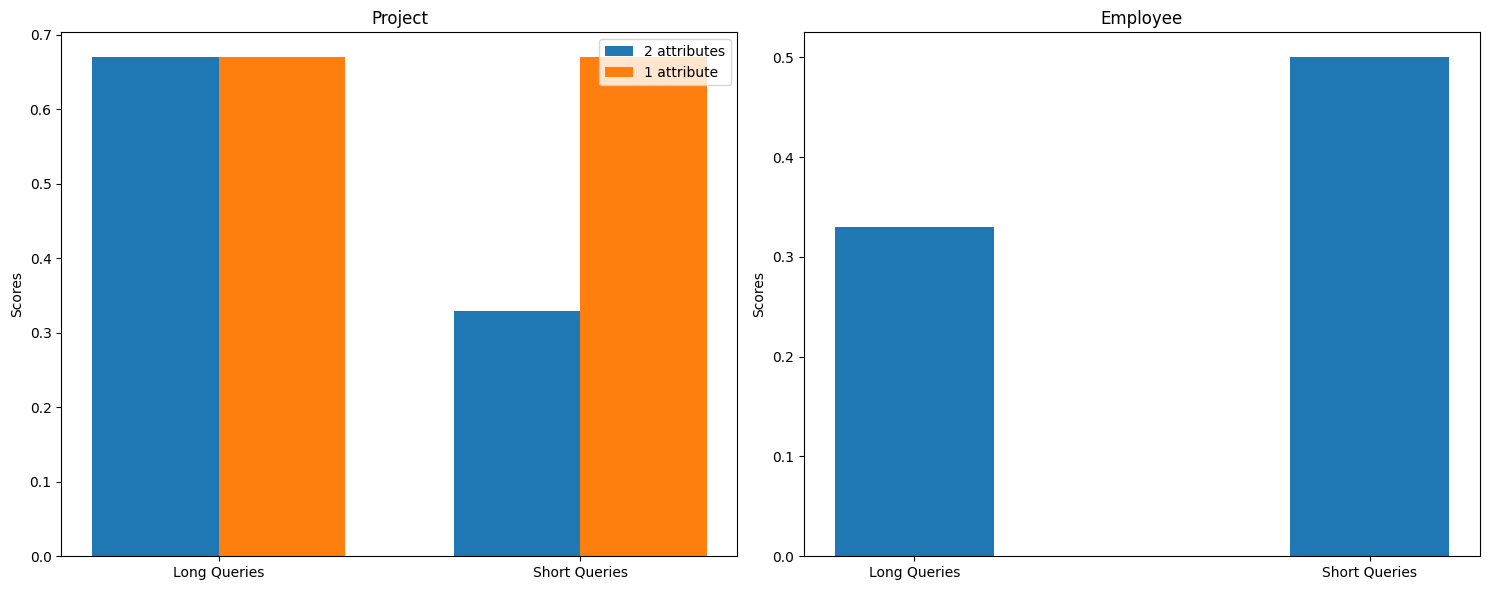

In [142]:
plot(robustness_for_long_queries, robustness_for_short_queries, second_dim=True)

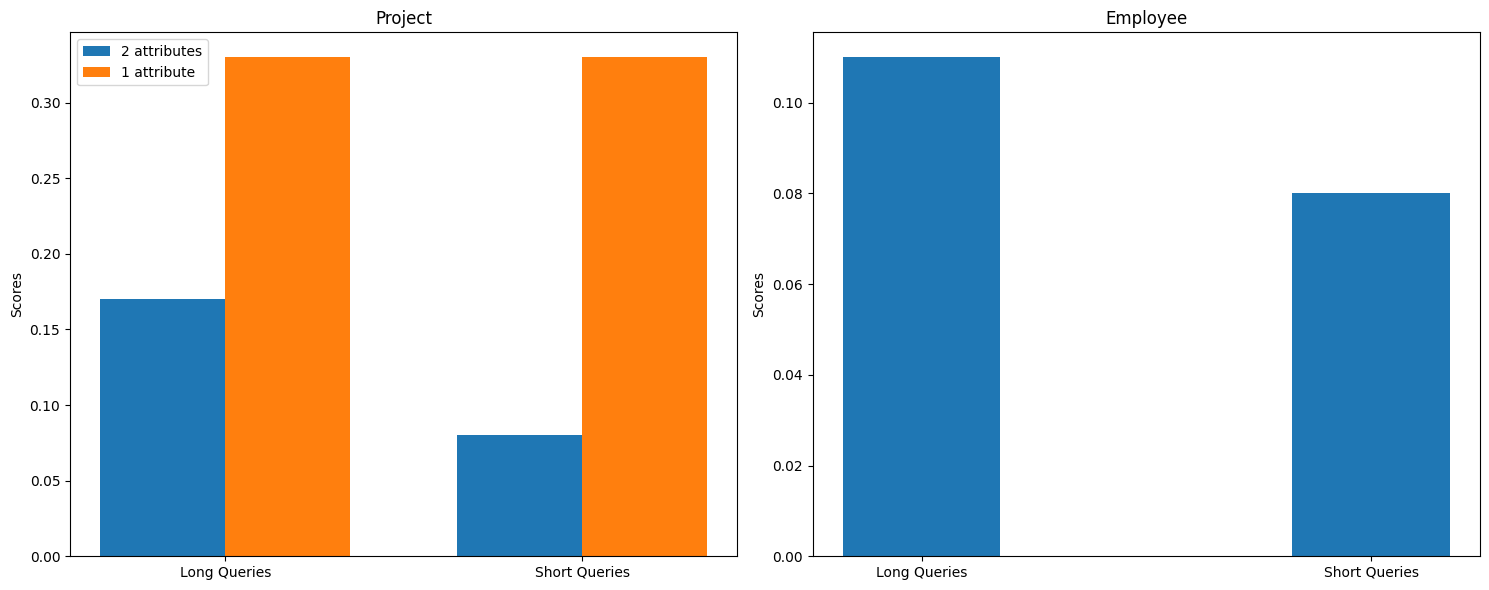

In [129]:
plot(accuracy_for_long_queries, accuracy_for_short_queries)

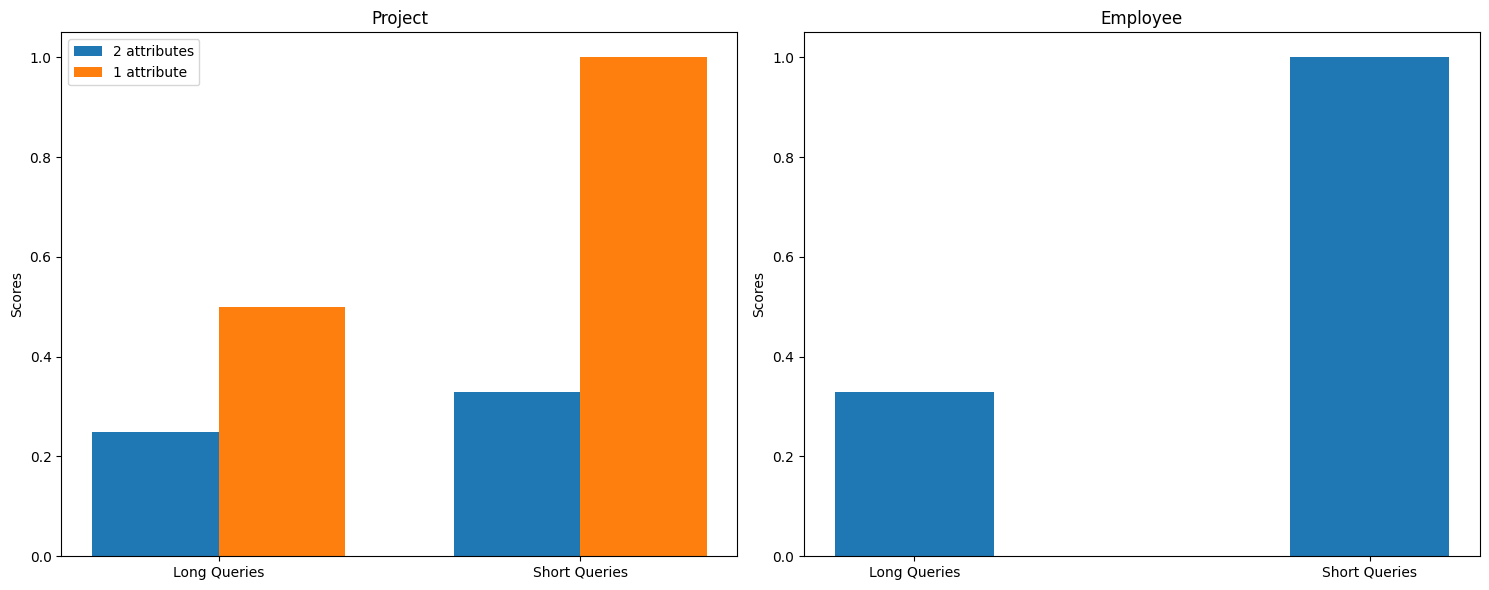

In [97]:
plot(best_case_accuracy_for_long_queries, best_case_accuracy_for_short_queries)

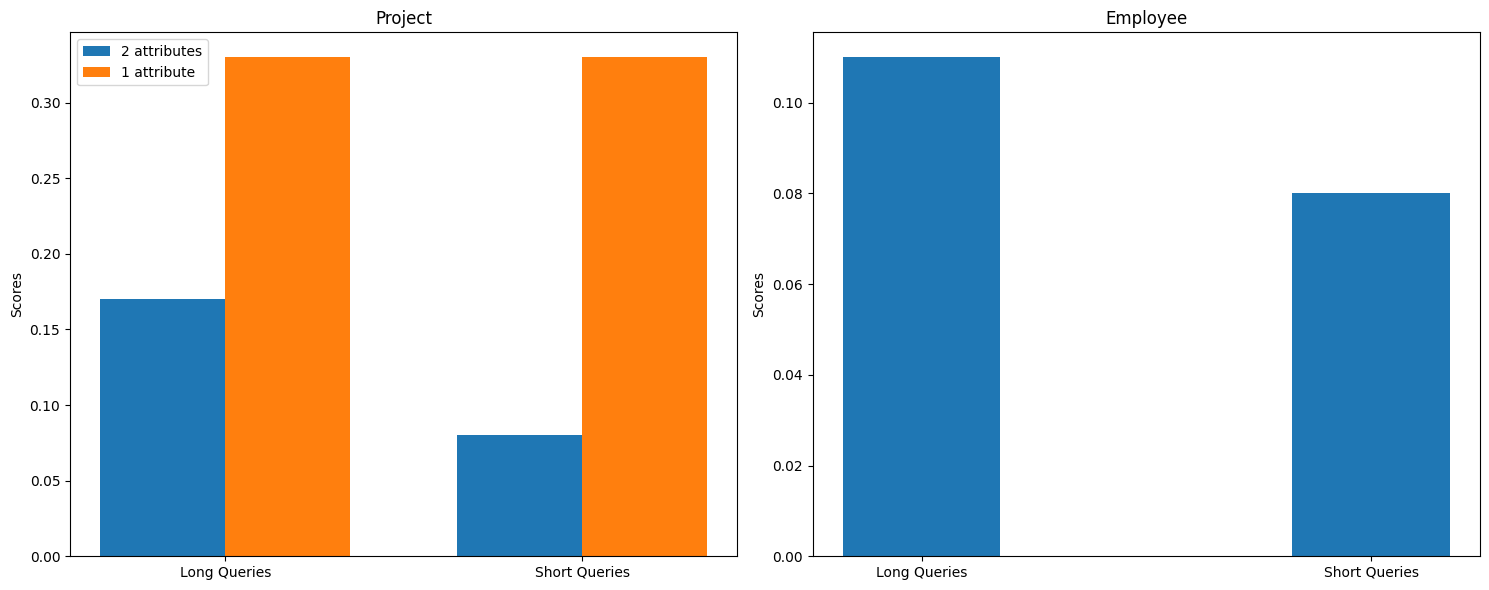

In [96]:
plot(accuracy_for_long_queries, accuracy_for_short_queries)

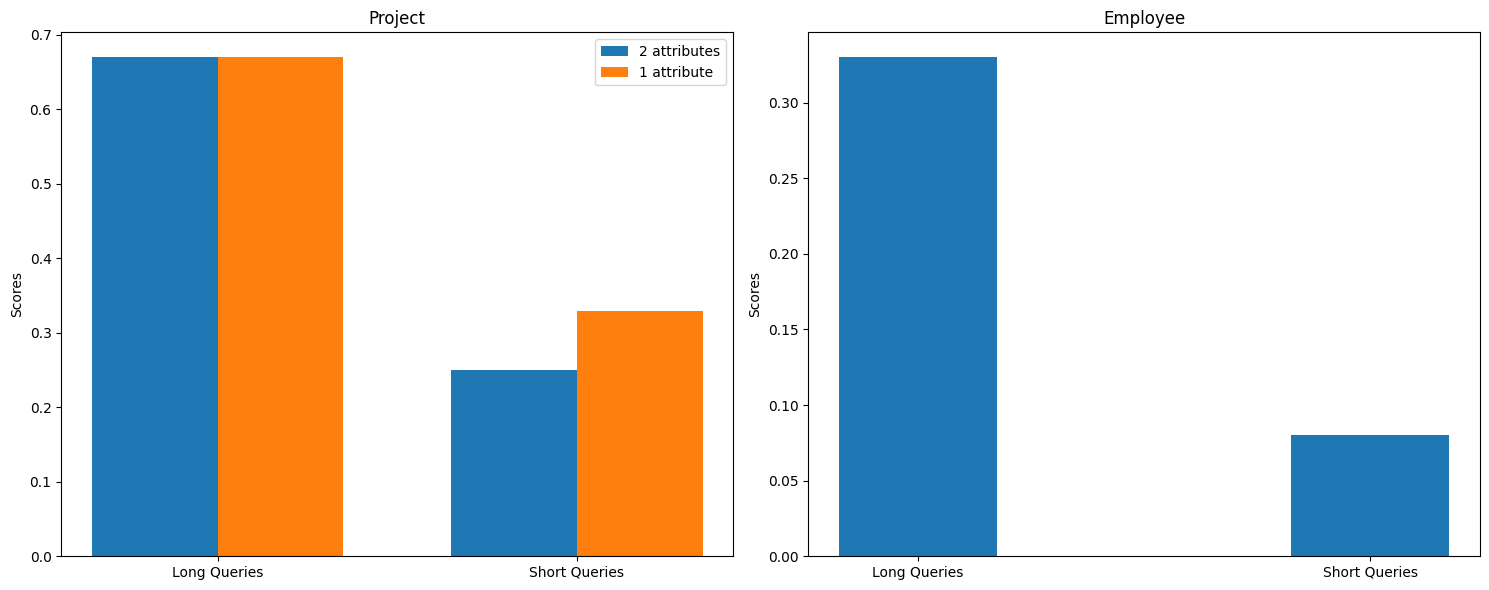

In [93]:
plot(robustness_for_long_queries, robustness_for_short_queries)

In [95]:
accuracy_for_short_queries.keys()

dict_keys(['Project_select1', 'Project_select2', 'Employee_select1', 'Company'])

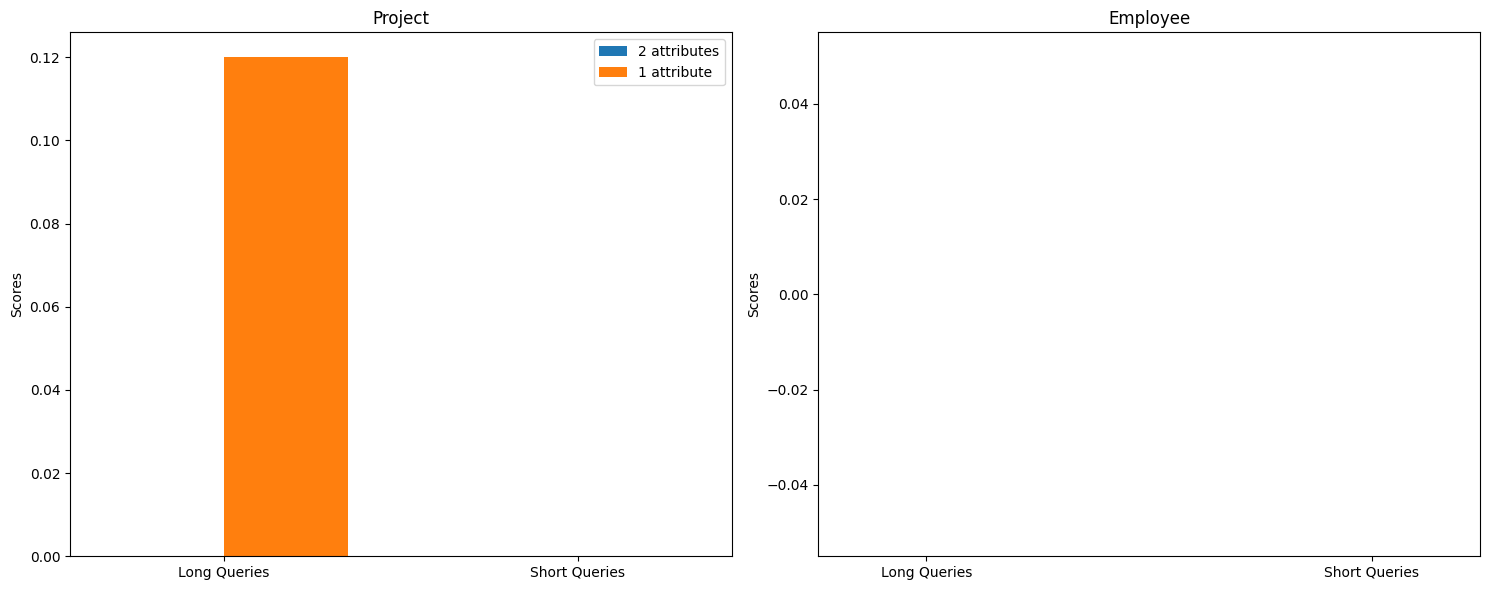

In [88]:
plot(robust_rates_for_long_queries, robust_rates_for_short_queries)

In [ ]:
# ~~~~~ Aurp Project ~~~~~
# ~~~~~ Non-robust (Long) ~~~~~
# Competent Group: 5 template logics * 3 long SQL-to-text transform rate * 8 documents = 120 long text queries 
# Gap groups:      5 template logics * 1 long SQL-to-text transform rate * 2  documents = 10 text queries
# Upper bound of Accuracy: 120/(120+10)= 0.92

# ~~~~~ Robust (Short) ~~~~~
# Competent Group: 5 template logics * 3 long SQL-to-text transform rate * 8 documents = 120 long text queries 
# Gap groups:      5 template logics * 3 long SQL-to-text transform rate * 2  documents = 30 text queries
# Upper bound of Accuracy: (120)/150= 0.8

In [10]:
##### Group Robustness (tag to correct/total numbers)#####
# Long queries
# 0.125
# Short queries
# 0.25

##### Robustness #####
# Long queries
# 0.6666666666666666
# Short queries
# 0.6666666666666666

##### Accuracy #####
# Long queries
# 0.3333333333333333
# Short queries
# 0.3333333333333333

    # Short queries
        # print("Slightly Robust Cluster (short queries)")
        # print("Index for Query Logic: (Correct, Total) in each group")
        # 0: (1, 3), 
        # 1: (1, 3), 
        # 2: (3, 3), 
        # 3: (3, 3), 
        # 4: (0, 3), => gap group
        # 5: (0, 3), => gap group
        # 6: (0, 3), => gap group
        # 7: (0, 3)  => gap group
        # total: (8, 24)
        # no gap group: (8, 12)
        # print("\tAccuracy:", 8/24)
        # print("\tRobustness:", 8/12)



~~~~~Stratified Groups~~~~~
Non-robust cluster (long queries): (12 examples in gap groups, 12 in non-gap groups)
(Correct, Total) in each group
	Accuracy: 0.3333333333333333
	Robustness: 0.6666666666666666


Robust Cluster (short queries): (12 examples in gap groups, 12 in non-gap groups)
(Correct, Total) in each group
	Accuracy: 0.4583333333333333
	Robustness: 0.9166666666666666


~~~~~Unbalanced Groups~~~~~
Non-robust: (6 examples in gap group, 12 in non-gap group)
(Correct, Total) in each group
Non-robust clusters (long queries)
	Accuracy: 0.4444444444444444
	Robustness: 0.6666666666666666


Robust Cluster (short queries)
Robust: (12 examples in gap group, 12 in non-gap group)
	Accuracy: 0.4583333333333333
	Robustness: 0.9166666666666666
